In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Loading Data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
#Storing  Data
df =  pd.read_csv('AAPL.csv')
#Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-08-23,2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
2021-08-24,2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786270,48606400
2021-08-25,2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200
2021-08-27,2021-08-27,147.479996,148.750000,146.830002,148.600006,147.771957,55802400
...,...,...,...,...,...,...,...
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
2022-08-16,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100
2022-08-17,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000


<function matplotlib.pyplot.show(*args, **kw)>

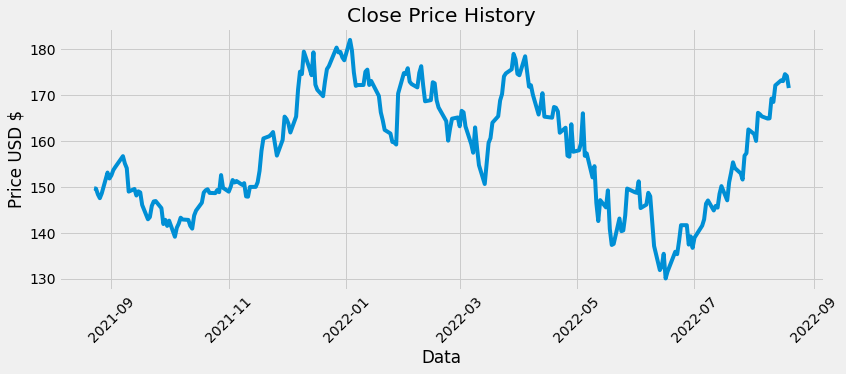

In [5]:
#Visualization
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Data')
plt.ylabel('Price USD $')
plt.show

In [6]:
#Calculate MACD and signal lines

#Calculate the short term EMA lines
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the long term EMA lines
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD
MACD = ShortEMA - LongEMA

#Calculate signal line
Signal = MACD.ewm(span=9, adjust=False).mean()

<function matplotlib.pyplot.show(*args, **kw)>

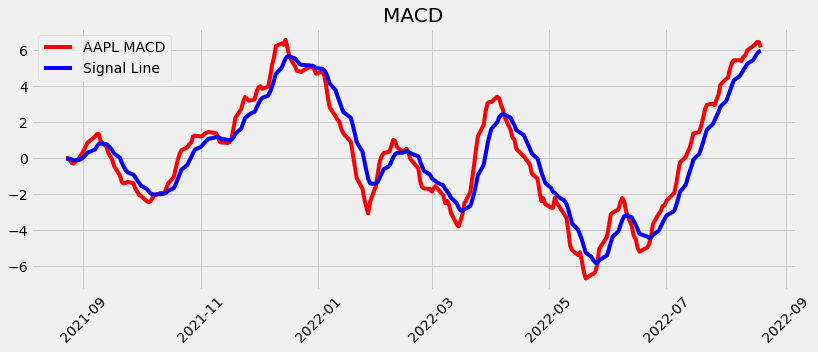

In [9]:
#Plottint

plt.figure(figsize=(12.2,4.5))
plt.title('AAPL MACD')
plt.plot(df.index, MACD, label= "AAPL MACD", color='red')
plt.plot(df.index, Signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show